<a href="https://colab.research.google.com/github/sookyannnn/SIEW-2022-Economic-Geography-in-East-Asia-and-Pacfic/blob/main/CH02_Economic_Inequality_(Moran).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Packages

In [ ]:
pip install pysal # run this cell first, restart runtime, run all

In [ ]:
pip install geopandas

In [ ]:
pip install esda

In [ ]:
pip install matplotlib

In [ ]:
pip install contextily

#Load Packages

In [ ]:
import seaborn as sns
import pandas as pd
import esda
from pysal.lib import weights
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
from esda.moran import Moran_Local

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Load Dataset

1.   Duplicate this Google Drive folder : https://drive.google.com/drive/folders/1C0lNnGSsCGdQ8kC-gGEBYt8L9UeAaNcv?usp=sharing
2.   Mount Google Drive to Google Collab

In [ ]:
# Read file
satellite = gpd.read_file("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Dataset/satellite.gpkg") 

In [ ]:
satellite.plot(column="econ_2005", 
        scheme="quantiles", 
        k=7,
        cmap="cividis",
        legend=True,
        figsize=(10, 10)
       )

# save
plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-Satellite_2005.png", dpi = 72)

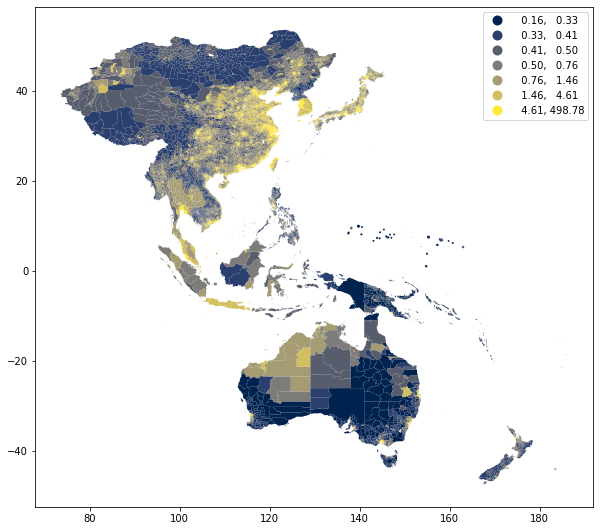

In [ ]:
satellite.plot(column="econ_2018", 
        scheme="quantiles", 
        k=7,
        cmap="cividis",
        legend=True,
        figsize=(10, 10)  
       )
# save
plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-Satellite_2018.png", dpi = 72)

# Compute spatial weight matrix

In [ ]:
#KNN
knn8= weights.KNN.from_dataframe(satellite, k=8)
knn8

/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
  warnings.warn(message)


In [ ]:
#Distance Band (for checking)

# Reproject crs (to get distance in metre)
satellite_proj = satellite.to_crs(epsg=8859)

# Extract centroids
cents = satellite_proj.centroid

# Extract coordinates into an array
pts = pd.DataFrame({"X": cents.x,
                    "Y": cents.y
                   }).values

# threshold (distance) which every observation to have at least one neighbor.
min_thr = weights.min_threshold_distance(pts)
min_thr

# minimum threshold: 846,378km (not recommended to be used)

846378.0809057071

## Standardisation

In [ ]:
# row standardise spatial weight matrices
knn8.transform = 'R'

In [ ]:
## standardise variables
satellite['econ_2005_std'] = (satellite['econ_2005'] - satellite['econ_2005'].mean()) / satellite['econ_2005'].std()
satellite['econ_2018_std'] = (satellite['econ_2018'] - satellite['econ_2018'].mean()) / satellite['econ_2018'].std()

## Compute Spatial Lag

In [ ]:
# calculate spatial lag
satellite['w_econ_2005_std'] = weights.lag_spatial(knn8, satellite['econ_2005_std'])
satellite['w_econ_2018_std'] = weights.lag_spatial(knn8, satellite['econ_2018_std'])

# ESDA

## Global Moran's I

In [ ]:
mi_econ_2005 = esda.Moran(satellite['econ_2005_std'], knn8)
mi_econ_2005.I

0.856848582782007

In [ ]:
mi_econ_2018 = esda.Moran(satellite['econ_2018_std'], knn8)
mi_econ_2018.I

0.6176383229309712

## P-value

In [ ]:
mi_econ_2005.p_sim

0.001

In [ ]:
mi_econ_2018.p_sim

0.001

## Local Moran's I

In [ ]:
lisa_econ_2005 = esda.Moran_Local(satellite['econ_2005_std'], knn8)
lisa_econ_2018 = esda.Moran_Local(satellite['econ_2018_std'], knn8)

## P-value (5% as threshold for statistical significance)

In [ ]:
satellite['significant05'] = lisa_econ_2005.p_sim < 0.05
satellite['significant18'] = lisa_econ_2018.p_sim < 0.05

## Quadrants

In [ ]:
# Store the quadrant they belong to
satellite['quadrant05'] = lisa_econ_2005.q
satellite['quadrant18'] = lisa_econ_2018.q

## Plot Global Moran's I, LISA and Choropleth (quantiles) maps

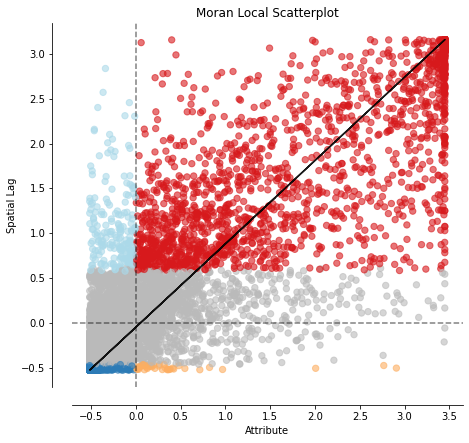

In [ ]:
# Moran's scatterplot
fig, ax = moran_scatterplot(lisa_econ_2005, p=0.05)
plt.show()

# save
#plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-Econ_2005_scatterplot.png", dpi = 72)

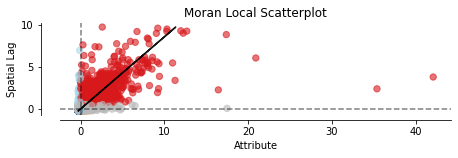

In [ ]:
# Moran's scatterplot
fig, ax = moran_scatterplot(lisa_econ_2018, p=0.05)
plt.show()

# save
#plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-Econ_2018_scatterplot.png", dpi = 72)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fea9588e550>)

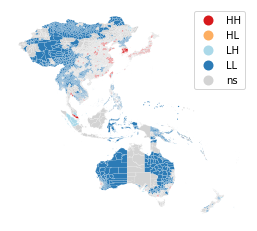

In [ ]:
# LISA map
lisa_cluster(lisa_econ_2005, satellite)

# save
#plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-LISA_2005.png", dpi = 72)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fea96ce1790>)

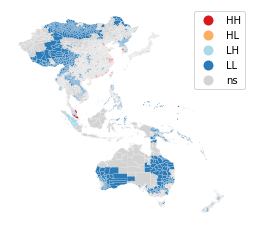

In [ ]:
# LISA map
lisa_cluster(lisa_econ_2018, satellite)

# save
#plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-LISA_2018.png", dpi = 72)


(<Figure size 1080x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea96b04050>,
       dtype=object))

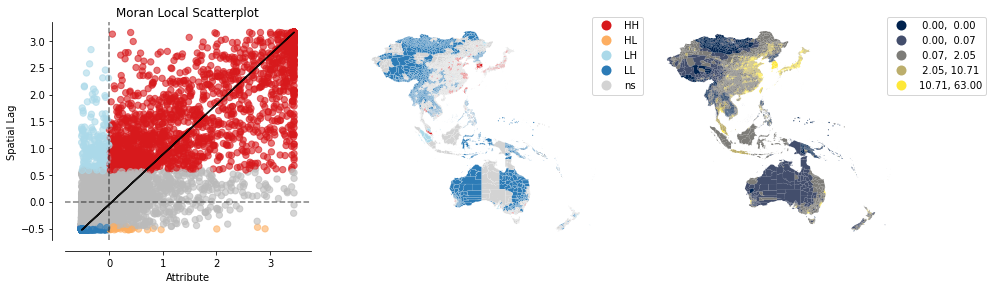

In [ ]:
# plot all
plot_local_autocorrelation(lisa_econ_2005, satellite, 'econ_2005',cmap="cividis")

# save
#plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-Econ_2005.png", dpi = 72)

(<Figure size 1080x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea96ae2f90>,
       dtype=object))

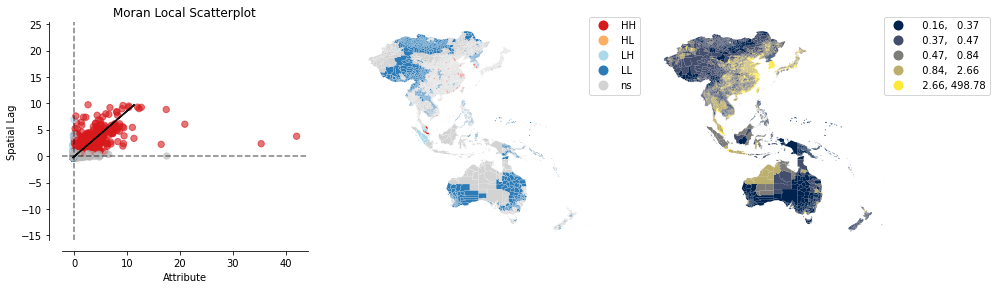

In [ ]:
# plot all
plot_local_autocorrelation(lisa_econ_2018, satellite, 'econ_2018',cmap="cividis")

# save
#plt.savefig("/content/drive/MyDrive/SIEW (2022) Economic Geography in East Asia and Pacfic/Figures/CH02-Econ_2018.png", dpi = 72)

## Calculating sum of regions in each quadrant

##2005

In [ ]:
hh = (satellite['quadrant05']==1) & (satellite['significant05']==True)
hh.sum()

1960

In [ ]:
ll = (satellite['quadrant05']==3) & (satellite['significant05']==True)
ll.sum()

6087

In [ ]:
lh = (satellite['quadrant05']==2) & (satellite['significant05']==True)
lh.sum()

194

In [ ]:
hl = (satellite['quadrant05']==4) & (satellite['significant05']==True)
hl.sum()

35

## 2018

In [ ]:
hh = (satellite['quadrant18']==1) & (satellite['significant18']==True)
hh.sum()

989

In [ ]:
ll = (satellite['quadrant18']==3) & (satellite['significant18']==True)
ll.sum()

5071

In [ ]:
lh = (satellite['quadrant18']==2) & (satellite['significant18']==True)
lh.sum()

145

In [ ]:
hl = (satellite['quadrant18']==4) & (satellite['significant18']==True)
hl.sum()

24